In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1647871817000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial19/', name='clinicaltrial19/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial20/', name='clinicaltrial20/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial21/', name='clinicaltrial21/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1651363501000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv.gz', name='clinicaltrial_2019_csv.gz', size=10060669, modificationTime=1647427233000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1651363503000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020_csv.gz', name='clinicaltrial_2020_csv.gz'

In [0]:
FilePath = "/FileStore/tables/clinicaltrial_2019_csv.gz"
FilePath2= "/FileStore/tables/clinicaltrial_2020_csv.gz"
FilePath3= "/FileStore/tables/clinicaltrial_2021_csv.gz"
dbutils.fs.cp(FilePath, "file:/tmp/")
dbutils.fs.cp(FilePath2, "file:/tmp/")
dbutils.fs.cp(FilePath3, "file:/tmp/")

Out[2]: True

In [0]:
%sh
gunzip /tmp/clinicaltrial_2019_csv.gz
gunzip /tmp/clinicaltrial_2020_csv.gz
gunzip /tmp/clinicaltrial_2021_csv.gz

gzip: /tmp/clinicaltrial_2021_csv already exists;	not overwritten


In [0]:
dbutils.fs.ls("file:/tmp/")

Out[4]: [FileInfo(path='file:/tmp/Rtmp6eVJFO/', name='Rtmp6eVJFO/', size=4096, modificationTime=1652306504701),
 FileInfo(path='file:/tmp/driver-daemon.pid', name='driver-daemon.pid', size=4, modificationTime=1652306414771),
 FileInfo(path='file:/tmp/.Test-unix/', name='.Test-unix/', size=4096, modificationTime=1652306389376),
 FileInfo(path='file:/tmp/ipykernel-connection-ReplId-2583a-102d0-b2098-6.json', name='ipykernel-connection-ReplId-2583a-102d0-b2098-6.json', size=294, modificationTime=1652309056412),
 FileInfo(path='file:/tmp/clinicaltrial_2019_csv', name='clinicaltrial_2019_csv', size=42400056, modificationTime=1652309057192),
 FileInfo(path='file:/tmp/clinicaltrial_2021_csv', name='clinicaltrial_2021_csv', size=50359696, modificationTime=1652306486442),
 FileInfo(path='file:/tmp/systemd-private-a954248807b0483c881f0bab6ab4b075-ntp.service-Etk4ff/', name='systemd-private-a954248807b0483c881f0bab6ab4b075-ntp.service-Etk4ff/', size=4096, modificationTime=1652306389416),
 FileInf

In [0]:
dbutils.fs.cp("file:/tmp/clinicaltrial_2019_csv", "file:/tmp/clinicaltrial_2019.csv")
dbutils.fs.mv("file:/tmp/clinicaltrial_2019.csv", "FileStore/tables/")

dbutils.fs.cp("file:/tmp/clinicaltrial_2020_csv", "file:/tmp/clinicaltrial_2020.csv")
dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "FileStore/tables/")

dbutils.fs.cp("file:/tmp/clinicaltrial_2021_csv", "file:/tmp/clinicaltrial_2021.csv")
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "FileStore/tables/")

Out[5]: True

In [0]:
dbutils.fs.ls("FileStore/tables/")

Out[6]: [FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1647871817000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial19/', name='clinicaltrial19/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial20/', name='clinicaltrial20/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial21/', name='clinicaltrial21/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1652309062000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019_csv.gz', name='clinicaltrial_2019_csv.gz', size=10060669, modificationTime=1647427233000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1652309065000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020_csv.gz', name='clinicaltrial_2020_csv.gz'

In [0]:
RDD = sc.textFile("dbfs:/FileStore/tables/clinicaltrial_2019.csv").distinct() #READ THE FILE INTO A RDD. DISTINCT() ENSURES ALL ROWS ARE UNIQUE AND NO DUPELICATES
header = RDD.take(1)[0] #HEADER ROW
RDD2019 = RDD.filter(lambda x: x != header) #FILTER OUT HEADER TO GET ONLY THE INDIVDUAL STUDIES 
RDD2019.count() #COUNT THE NUMBER OF STUDIES 

Out[7]: 326348

In [0]:
RDD = sc.textFile("dbfs:/FileStore/tables/clinicaltrial_2020.csv").distinct() #READ THE FILE INTO A RDD. DISTINCT() ENSURES ALL ROWS ARE UNIQUE AND NO DUPELICATES
header = RDD.take(1)[0] #HEADER ROW
RDD2020 = RDD.filter(lambda x: x != header) #FILTER OUT HEADER TO GET ONLY THE INDIVDUAL STUDIES 
RDD2020.count() #COUNT THE NUMBER OF STUDIES 

Out[8]: 356466

In [0]:
RDD = sc.textFile("dbfs:/FileStore/tables/clinicaltrial_2021.csv").distinct() #READ THE FILE INTO A RDD. DISTINCT() ENSURES ALL ROWS ARE UNIQUE AND NO DUPELICATES
header = RDD.take(1)[0] #HEADER ROW
RDD2021 = RDD.filter(lambda x: x != header) #FILTER OUT HEADER TO GET ONLY THE INDIVDUAL STUDIES 
RDD2021.count() #COUNT THE NUMBER OF STUDIES 

Out[9]: 387261

In [0]:
RDD = sc.textFile("dbfs:/FileStore/tables/clinicaltrial_2021.csv").distinct()
header = RDD.take(1)[0]
RDD2021 = RDD.filter(lambda x: x != header)
RDD2021.count()

Out[10]: 387261

In [0]:
RDD.take(5)

Out[11]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|']

In [0]:
SplitRDD = RDD2019.map(lambda s: (s.split("|")[5],1))
FreqRDD = SplitRDD.reduceByKey(lambda x,y: x+y)
SortedRDD = FreqRDD.sortBy(lambda x: x[1], ascending= False)
SortedRDD.collect()

Out[12]: [('Interventional', 255945),
 ('Observational', 64163),
 ('Observational [Patient Registry]', 6171),
 ('Expanded Access', 69)]

In [0]:
SplitRDD = RDD2020.map(lambda s: (s.split("|")[5],1))
FreqRDD = SplitRDD.reduceByKey(lambda x,y: x+y)
SortedRDD = FreqRDD.sortBy(lambda x: x[1], ascending= False)
SortedRDD.collect()

Out[13]: [('Interventional', 277631),
 ('Observational', 71434),
 ('Observational [Patient Registry]', 7332),
 ('Expanded Access', 69)]

In [0]:
SplitRDD = RDD2021.map(lambda s: (s.split("|")[5],1))
FreqRDD = SplitRDD.reduceByKey(lambda x,y: x+y)
SortedRDD = FreqRDD.sortBy(lambda x: x[1], ascending= False)
SortedRDD.collect()

Out[14]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
EA_RDD = RDD2021.map(lambda s: s.split("|")).map(lambda x: (x[5],x[7])).filter(lambda s: s[0] == "Expanded Access")
EA_RDD.take(69)

Out[15]: [('Expanded Access', 'Arthritis,Emergencies'),
 ('Expanded Access', ''),
 ('Expanded Access', 'Hepatitis A,Hepatitis B,Hepatitis,Chronic Disease'),
 ('Expanded Access', 'Infections,Communicable Diseases'),
 ('Expanded Access',
  'Infections,Communicable Diseases,Clostridium Infections,Enterocolitis'),
 ('Expanded Access', 'Renal Insufficiency,Kidney Failure'),
 ('Expanded Access', 'Hepatic Veno-Occlusive Disease'),
 ('Expanded Access', 'Breast Neoplasms'),
 ('Expanded Access', ''),
 ('Expanded Access', 'Leukemia,Blast Crisis'),
 ('Expanded Access', 'Neuroendocrine Tumors'),
 ('Expanded Access', 'Epilepsy'),
 ('Expanded Access', 'Kidney Diseases,Renal Insufficiency,Hypertension'),
 ('Expanded Access', 'Carcinoma'),
 ('Expanded Access', ''),
 ('Expanded Access', 'Lambert-Eaton Myasthenic Syndrome,Syndrome'),
 ('Expanded Access', 'Lambert-Eaton Myasthenic Syndrome,Syndrome'),
 ('Expanded Access', 'Neoplasms'),
 ('Expanded Access', 'Osteoporosis'),
 ('Expanded Access', 'Leukemia')

In [0]:
SplitRDD = RDD2021.map(lambda s: (s.split("|")[5],1))
SplitRDD.take(3)

Out[16]: [('Interventional', 1), ('Interventional', 1), ('Interventional', 1)]

In [0]:
SplitRDD = RDD2019.map(lambda s: s.split("|")[7]).flatMap(lambda s: s.split(","))
FiltRDD = SplitRDD.filter(lambda x: x != "").map(lambda x: (x,1))
FreqRDD = FiltRDD.reduceByKey(lambda x,y: x+y)
SortedRDD2019 = FreqRDD.sortBy(lambda x: x[1], ascending= False)
SortedRDD2019.take(5)

Out[17]: [('Carcinoma', 11155),
 ('Diabetes Mellitus', 9830),
 ('Neoplasms', 7815),
 ('Breast Neoplasms', 7486),
 ('Syndrome', 6842)]

In [0]:
SplitRDD = RDD2020.map(lambda s: s.split("|")[7]).flatMap(lambda s: s.split(","))
FiltRDD = SplitRDD.filter(lambda x: x != "").map(lambda x: (x,1))
FreqRDD = FiltRDD.reduceByKey(lambda x,y: x+y)
SortedRDD2020 = FreqRDD.sortBy(lambda x: x[1], ascending= False)
SortedRDD2020.take(5)

Out[18]: [('Carcinoma', 12245),
 ('Diabetes Mellitus', 10425),
 ('Neoplasms', 8534),
 ('Breast Neoplasms', 8009),
 ('Syndrome', 7419)]

In [0]:
SplitRDD = RDD2021.map(lambda s: s.split("|")[7]).flatMap(lambda s: s.split(","))
FiltRDD = SplitRDD.filter(lambda x: x != "").map(lambda x: (x,1))
FreqRDD = FiltRDD.reduceByKey(lambda x,y: x+y)
SortedRDD2021 = FreqRDD.sortBy(lambda x: x[1], ascending= False)
SortedRDD2021.take(5)

Out[19]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

In [0]:
SortedRDD2021.count()

Out[20]: 3437

In [0]:
MeshRDD = sc.textFile("dbfs:/FileStore/tables/mesh.csv")
MeshRDD.take(10)

Out[21]: ['term,tree',
 'Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800',
 'Temefos,D02.886.300.692.800',
 'Abate,D02.705.400.625.800',
 'Abate,D02.705.539.345.800',
 'Abate,D02.886.300.692.800',
 'Difos,D02.705.400.625.800']

In [0]:
MeshRDD = sc.textFile("dbfs:/FileStore/tables/mesh.csv") 
MeshRDDF = MeshRDD.map(lambda x: x.split(",")).map(lambda x: (x[0],x[1]))
MeshRDDS = MeshRDDF.map(lambda x: (x[0],x[1].split("."))).map(lambda x: ((x[0],x[1][0]),1)).reduceByKey(lambda x,y: x+y)
MeshRDDP = MeshRDDS.map(lambda x: (x[0][0],(x[0][1], x[1])))
RDDJoin = SortedRDD2019.join(MeshRDDP).map(lambda x: (x[0],x[1][1][0],x[1][0],x[1][1][1]))
RDDJ1 = RDDJoin.map(lambda x: (x[1], x[2]*x[3])).reduceByKey(lambda x,y:x+y).sortBy(lambda x: x[1], ascending= False)
RDDJ1.take(5)

Out[22]: [('C04', 123221),
 ('C23', 113997),
 ('C14', 82043),
 ('C10', 76665),
 ('C01', 73477)]

In [0]:
MeshRDD = sc.textFile("dbfs:/FileStore/tables/mesh.csv") 
MeshRDDF = MeshRDD.map(lambda x: x.split(",")).map(lambda x: (x[0],x[1]))
MeshRDDS = MeshRDDF.map(lambda x: (x[0],x[1].split("."))).map(lambda x: ((x[0],x[1][0]),1)).reduceByKey(lambda x,y: x+y)
MeshRDDP = MeshRDDS.map(lambda x: (x[0][0],(x[0][1], x[1])))
RDDJoin = SortedRDD2020.join(MeshRDDP).map(lambda x: (x[0],x[1][1][0],x[1][0],x[1][1][1]))
RDDJ1 = RDDJoin.map(lambda x: (x[1], x[2]*x[3])).reduceByKey(lambda x,y:x+y).sortBy(lambda x: x[1], ascending= False)
RDDJ1.take(5)

Out[23]: [('C04', 133091),
 ('C23', 124589),
 ('C01', 94293),
 ('C14', 88065),
 ('C10', 83894)]

In [0]:
MeshRDD = sc.textFile("dbfs:/FileStore/tables/mesh.csv") 
MeshRDDF = MeshRDD.map(lambda x: x.split(",")).map(lambda x: (x[0],x[1]))
MeshRDDS = MeshRDDF.map(lambda x: (x[0],x[1].split("."))).map(lambda x: ((x[0],x[1][0]),1)).reduceByKey(lambda x,y: x+y)
MeshRDDP = MeshRDDS.map(lambda x: (x[0][0],(x[0][1], x[1])))
RDDJoin = SortedRDD2021.join(MeshRDDP).map(lambda x: (x[0],x[1][1][0],x[1][0],x[1][1][1]))
RDDJ1 = RDDJoin.map(lambda x: (x[1], x[2]*x[3])).reduceByKey(lambda x,y:x+y).sortBy(lambda x: x[1], ascending= False)
RDDJ1.take(5)

Out[24]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

In [0]:
MeshRDD = sc.textFile("dbfs:/FileStore/tables/mesh.csv") 
MeshRDDF = MeshRDD.map(lambda x: x.split(",")).map(lambda x: (x[0],x[1]))
MeshRDDS = MeshRDDF.map(lambda x: (x[0],x[1].split("."))).map(lambda x: ((x[0],x[1][0]),1)).reduceByKey(lambda x,y: x+y)
MeshRDDP = MeshRDDS.map(lambda x: (x[0][0],(x[0][1], x[1])))
MeshRDDP.take(10)

Out[25]: [('term', ('tree', 1)),
 ('Calcimycin', ('D03', 1)),
 ('A-23187', ('D03', 1)),
 ('Abate', ('D02', 3)),
 ('Difos', ('D02', 3)),
 ('Abattoirs', ('J01', 1)),
 ('Abbreviations as Topic', ('L01', 1)),
 ('Abdomen', ('A01', 1)),
 ('Abdominal Neoplasms', ('C04', 1)),
 ('Cremaster Muscle', ('A02', 1))]

In [0]:
PharmaRDD = sc.textFile("dbfs:/FileStore/tables/pharma.csv")
PharmaRDD1 = PharmaRDD.map(lambda x: x.split('","')).map(lambda x: x[1])
headerPharma = PharmaRDD1.take(1)[0]
PhRDD = PharmaRDD1.filter(lambda x: x != headerPharma)

In [0]:
PharmaRDD.take(1)

Out[27]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"']

In [0]:
RDD19 = RDD2019.map(lambda s: (s.split("|")[1],1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], ascending= False)

PhRDDlist = PhRDD.collect()

RDD_Sponser19 = RDD19.filter(lambda s: s[0] not in PhRDDlist)
RDD_Sponser19.take(10)

Out[28]: [('National Cancer Institute (NCI)', 3003),
 ('Merck Sharp & Dohme Corp.', 2124),
 ('M.D. Anderson Cancer Center', 2097),
 ('Mayo Clinic', 1930),
 ('Novartis Pharmaceuticals', 1881),
 ('Assistance Publique - Hôpitaux de Paris', 1764),
 ('Massachusetts General Hospital', 1715),
 ('Hoffmann-La Roche', 1694),
 ('National Taiwan University Hospital', 1608),
 ('Eli Lilly and Company', 1500)]

In [0]:
RDD20 = RDD2020.map(lambda s: (s.split("|")[1],1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], ascending= False)

PhRDDlist = PhRDD.collect()

RDD_Sponser20 = RDD20.filter(lambda s: s[0] not in PhRDDlist)
RDD_Sponser20.take(10)

Out[29]: [('National Cancer Institute (NCI)', 3100),
 ('M.D. Anderson Cancer Center', 2238),
 ('Merck Sharp & Dohme Corp.', 2184),
 ('Mayo Clinic', 2097),
 ('Assistance Publique - Hôpitaux de Paris', 2043),
 ('Novartis Pharmaceuticals', 1962),
 ('Massachusetts General Hospital', 1823),
 ('Assiut University', 1806),
 ('Hoffmann-La Roche', 1761),
 ('National Taiwan University Hospital', 1720)]

In [0]:
RDD21 = RDD2021.map(lambda s: (s.split("|")[1],1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], ascending= False)

PhRDDlist = PhRDD.collect()

RDD_Sponser21 = RDD21.filter(lambda s: s[0] not in PhRDDlist)
RDD_Sponser21.take(10)

Out[30]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

In [0]:
RDD2019.take(2)

Out[31]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|']

In [0]:
Completed_RDD2019 = RDD2019.map(lambda s: (s.split("|"))).map(lambda f: (f[2], f[4])).filter(lambda f: "2019" in f[1] and "Completed" in f[0]).map(lambda x: (x[1],1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], ascending= False)

Completed_RDD2019DF = Completed_RDD2019.toDF().toPandas()
print(Completed_RDD2019DF)

          _1    _2
0   Dec 2019  2690
1   Jun 2019  1647
2   Jul 2019  1547
3   Mar 2019  1470
4   Sep 2019  1421
5   Aug 2019  1406
6   Apr 2019  1368
7   Jan 2019  1368
8   May 2019  1342
9   Oct 2019  1310
10  Nov 2019  1223
11  Feb 2019  1149


/databricks/python/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <BarContainer object of 12 artists> has a label of '_2' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
Out[33]: <AxesSubplot:>

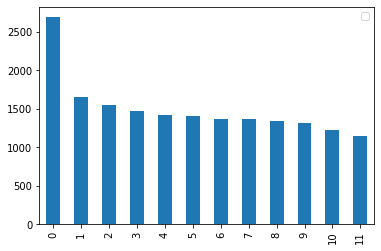

In [0]:
import pandas as pd
import numpy as np

Completed_RDD2019DF.plot.bar()

In [0]:
Completed_RDD2020 = RDD2020.map(lambda s: (s.split("|"))).map(lambda f: (f[2], f[4])).filter(lambda f: "2020" in f[1] and "Completed" in f[0]).map(lambda x: (x[1],1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], ascending= False)

Completed_RDD2020DF = Completed_RDD2020.toDF().toPandas()
print(Completed_RDD2020DF)

          _1    _2
0   Dec 2020  2084
1   Mar 2020  1740
2   Jan 2020  1544
3   Jun 2020  1424
4   Feb 2020  1286
5   Jul 2020  1237
6   Oct 2020  1176
7   May 2020  1176
8   Sep 2020  1167
9   Aug 2020  1126
10  Apr 2020  1080
11  Nov 2020  1078


In [0]:
Completed_RDD2021 = RDD2021.map(lambda s: (s.split("|"))).map(lambda f: (f[2], f[4])).filter(lambda f: "2021" in f[1] and "Completed" in f[0]).map(lambda x: (x[1],1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], ascending= False)
Completed_RDD2021.collect()

Out[35]: [('Mar 2021', 1227),
 ('Jan 2021', 1131),
 ('Jun 2021', 1094),
 ('May 2021', 984),
 ('Apr 2021', 967),
 ('Feb 2021', 934),
 ('Jul 2021', 819),
 ('Aug 2021', 700),
 ('Sep 2021', 528),
 ('Oct 2021', 187)]

/databricks/python/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <BarContainer object of 10 artists> has a label of '_2' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
Out[36]: Text(0.5, 0, 'Month')

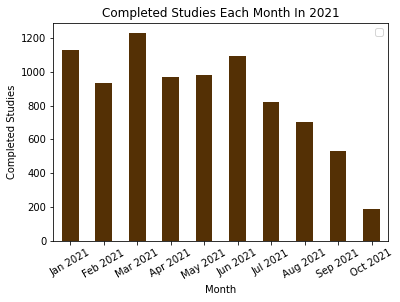

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Completed_RDD2021DF = Completed_RDD2021.toDF().toPandas().reindex([1,5,0,4,3,2,6,7,8,9])
first_column = Completed_RDD2021DF.iloc[:, 0].astype('string')

Completed_RDD2021DF.plot(kind='bar', colormap='BrBG').set_xticklabels(Completed_RDD2021DF._1)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Completed Studies Each Month In 2021")
plt.ylabel("Completed Studies")
plt.xlabel("Month")

In [0]:
Completed_RDD2021 = RDD2021.map(lambda s: (s.split("|"))).map(lambda f: (f[2], f[4])).filter(lambda f: "2021" in f[1]).filter(lambda f: "Recruiting" in f[0]).map(lambda x: (x[1],1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], ascending= False)
Completed_RDD2021.collect()

Out[37]: [('Dec 2021', 5566),
 ('Oct 2021', 1156),
 ('Sep 2021', 1121),
 ('Nov 2021', 1061),
 ('Jun 2021', 828),
 ('Aug 2021', 725),
 ('Jul 2021', 680),
 ('May 2021', 430),
 ('Mar 2021', 420),
 ('Apr 2021', 402),
 ('Jan 2021', 278),
 ('Feb 2021', 235)]

/databricks/python/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <BarContainer object of 12 artists> has a label of '_2' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
Out[38]: Text(0.5, 0, 'Month')

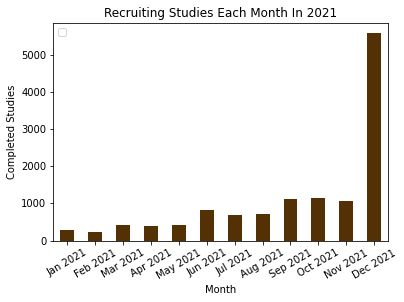

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Completed_RDD2021DF = Completed_RDD2021.toDF().toPandas().reindex([10,11,8,9,7,4,6,5,2,1,3,0])
first_column = Completed_RDD2021DF.iloc[:, 0].astype('string')

Completed_RDD2021DF.plot(kind='bar', colormap='BrBG').set_xticklabels(Completed_RDD2021DF._1)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Recruiting Studies Each Month In 2021")
plt.ylabel("Completed Studies")
plt.xlabel("Month")